In [98]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib

import sys

sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Plotting") #\plots.py")
from plots import *
from post_processing_class import TensorTomographyReconstruction

%reload_ext autoreload
%autoreload 2

In [15]:
validation1_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\analysis\SASTT\Validation1_filter3_5cube_4off_0align\SH\results\result_Validation1_filter3_5cube_4off_0align_q17-40_all_again_symbolic.mat"
validation1_fasit = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\Validation1_filter3_5cube_4off_0align.mat"
validation1 = TensorTomographyReconstruction(validation1_path, dataset=False)
fasit1 = TensorTomographyReconstruction(validation1_fasit, dataset=True)

C:\Users\Bruker\AppData\Local\Temp\ipykernel_26692\3527075693.py:10: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(im)


0.17082266359235282 0.1610873342021557
0.6899999999999996 3.3306690738754696e-16


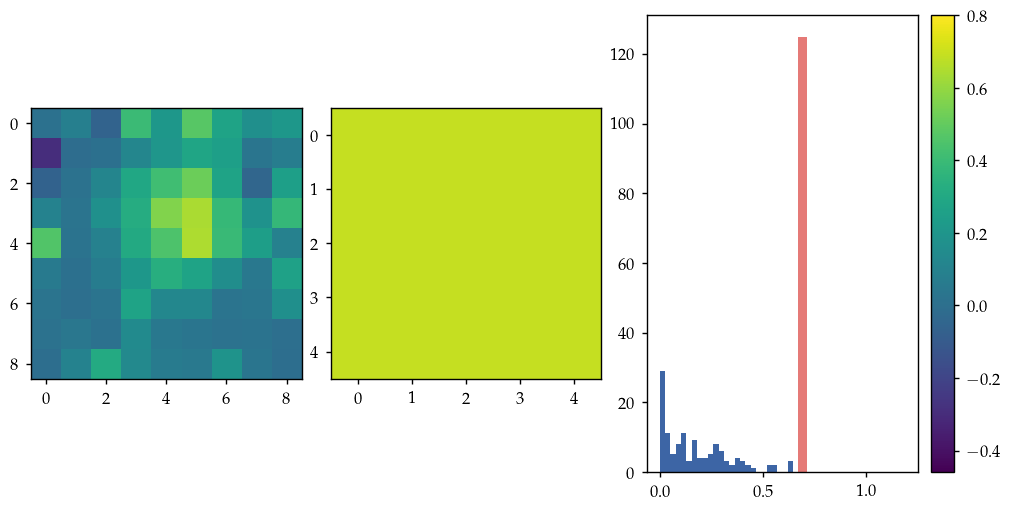

In [49]:
key = "a0"
if key == "phi" or key == "theta":
    r = (0, np.pi)
else:
    r = None
vmin = np.min(validation1[key])
vmax = np.max(validation1[key])
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
im = axs[0].imshow(validation1[key][5, :, :], vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
axs[1].imshow(fasit1[key][2, :, :], vmin=vmin, vmax=vmax)
axs[2].hist(validation1[key][2:-2, 2:-2, 2:-2].flatten(), bins=25, range= r)
axs[2].hist(fasit1[key].flatten(), bins=25, range= r)

#Artefacts due to the convolutional mask. Or starting conditions should not be that high.
print(np.mean(validation1[key][2:-2, 2:-2, 2:-2]), np.std(validation1[key][2:-2, 2:-2, 2:-2]))
print(np.mean(fasit1[key][:, :, :]), np.std(fasit1[key][:, :, :]))

In [55]:
validation2_nofilter_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\analysis\SASTT\Validation1_filter0_5cube_4off_0align\SH\results\result_Validation1_filter0_5cube_4off_0align_q17-40_all_again_symbolic.mat"
validation2_nofilter = TensorTomographyReconstruction(validation2_nofilter_path, dataset=False)

C:\Users\Bruker\AppData\Local\Temp\ipykernel_26692\3837383316.py:10: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(im)


1.0648299425456358 0.412118881591434
1.047197551196598 4.440892098500626e-16


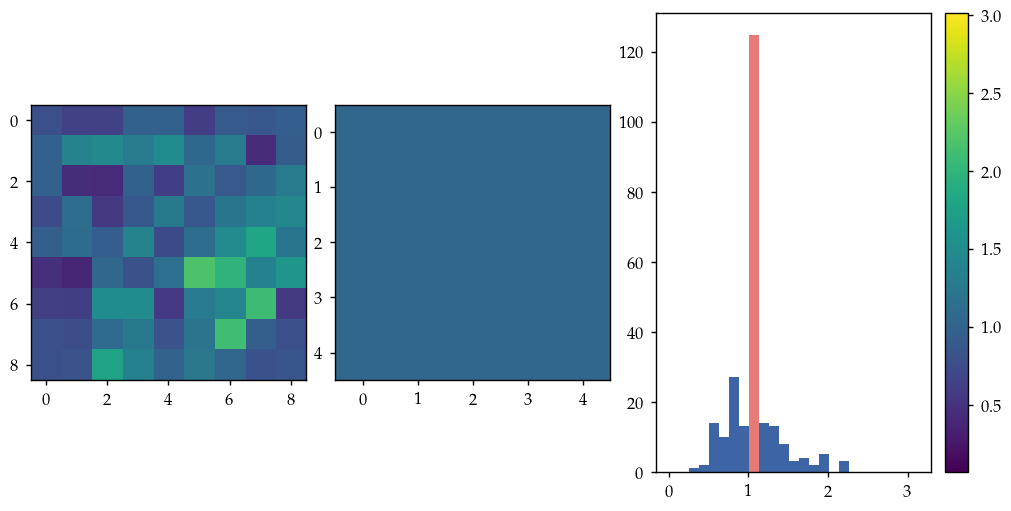

In [63]:
key = "theta"
if key == "phi" or key == "theta":
    r = (0, np.pi)
else:
    r = None
vmin = np.min(validation2_nofilter[key])
vmax = np.max(validation2_nofilter[key])
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
im = axs[0].imshow(validation2_nofilter[key][5, :, :], vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
axs[1].imshow(fasit1[key][2, :, :], vmin=vmin, vmax=vmax)
axs[2].hist(validation2_nofilter[key][2:-2, 2:-2, 2:-2].flatten(), bins=25, range= r)
axs[2].hist(fasit1[key].flatten(), bins=25, range= r)

#Artefacts due to the convolutional mask. Or starting conditions should not be that high.
print(np.mean(validation2_nofilter[key][2:-2, 2:-2, 2:-2]), np.std(validation2_nofilter[key][2:-2, 2:-2, 2:-2]))
print(np.mean(fasit1[key][:, :, :]), np.std(fasit1[key][:, :, :]))

In [70]:
validation_periodic_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\analysis\SASTT\Validation_periodic_filter3_5cube_10off_0align\SH\results\result_Validation_periodic_filter3_5cube_10off_0align_q17-40_all_again_symbolic.mat"
validation_periodic_dataset_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\Validation_periodic_filter3_5cube_10off_0align.mat"
validation_periodic = TensorTomographyReconstruction(validation_periodic_path, dataset=False)
fasit_periodic = TensorTomographyReconstruction(validation_periodic_dataset_path, dataset=True)


C:\Users\Bruker\AppData\Local\Temp\ipykernel_26692\388221481.py:12: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(im)


1.0606591871212598 0.012019444762285702
1.0471975511965979 4.440892098500626e-16


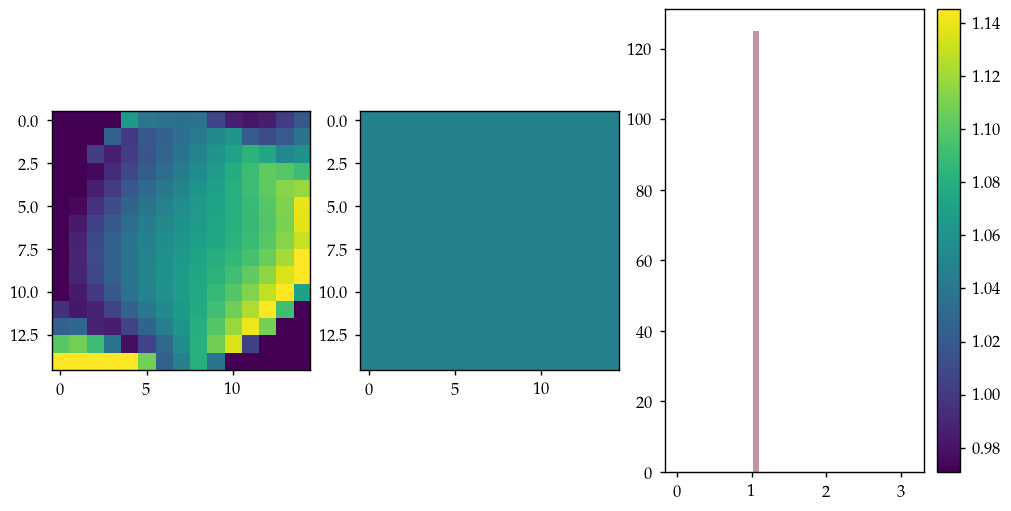

In [91]:
key = "theta"
slice1, slice2 = fasit_periodic.slice
vmin = np.min(validation_periodic[key][slice1:slice2, slice1:slice2, slice1:slice2]) - 5* np.std(validation_periodic[key][slice1:slice2, slice1:slice2, slice1:slice2])
vmax = np.max(validation_periodic[key][slice1:slice2, slice1:slice2, slice1:slice2]) + 5* np.std(validation_periodic[key][slice1:slice2, slice1:slice2, slice1:slice2])
if key == "phi" or key == "theta":
    r = (0, np.pi)
else:
    r = (vmin, vmax)

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
im = axs[0].imshow(validation_periodic[key][7, :, :], vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
axs[1].imshow(fasit_periodic[key][7, :, :], vmin=vmin, vmax=vmax)
axs[2].hist(validation_periodic[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=40, range= r, alpha = 0.5)
axs[2].hist(fasit_periodic[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=40, range= r, alpha = 0.5)

print(np.mean(validation_periodic[key][slice1:slice2, slice1:slice2, slice1:slice2]), np.std(validation_periodic[key][slice1:slice2, slice1:slice2, slice1:slice2]))
print(np.mean(fasit_periodic[key][:, :, :]), np.std(fasit1[key][:, :, :]))

In [99]:
validation_periodic_limit_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\analysis\SASTT\Validation_periodic_filter1_5cube_4off_0align\SH\results\result_Validation_periodic_filter1_5cube_4off_0align_q17-40_all_again_symbolic.mat"
validation_periodic_limit_dataset_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\Validation_periodic_filter1_5cube_4off_0align.mat"
validation_periodic_limit = TensorTomographyReconstruction(validation_periodic_limit_path, dataset=False)
fasit_periodic_limit = TensorTomographyReconstruction(validation_periodic_limit_dataset_path, dataset=True)


C:\Users\Bruker\AppData\Local\Temp\ipykernel_1976\2130820398.py:12: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(im)


0.6506141351402508 0.10204890654715566
0.6899999999999998 1.1102230246251565e-16
[0.2879974]


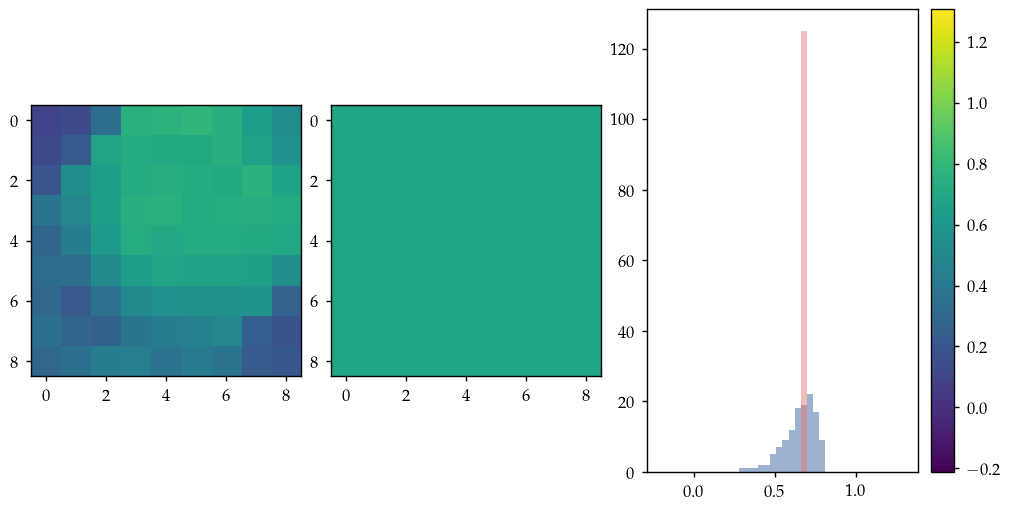

In [100]:
key = "a0"
slice1, slice2 = fasit_periodic_limit.slice
vmin = np.min(validation_periodic_limit[key][slice1:slice2, slice1:slice2, slice1:slice2]) - 5* np.std(validation_periodic_limit[key][slice1:slice2, slice1:slice2, slice1:slice2])
vmax = np.max(validation_periodic_limit[key][slice1:slice2, slice1:slice2, slice1:slice2]) + 5* np.std(validation_periodic_limit[key][slice1:slice2, slice1:slice2, slice1:slice2])
if key == "phi" or key == "theta":
    r = (0, np.pi)
else:
    r = (vmin, vmax)

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
im = axs[0].imshow(validation_periodic_limit[key][4, :, :], vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
axs[1].imshow(fasit_periodic_limit[key][4, :, :], vmin=vmin, vmax=vmax)
axs[2].hist(validation_periodic_limit[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=40, range= r, alpha = 0.5)
axs[2].hist(fasit_periodic_limit[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=40, range= r, alpha = 0.5)

print(np.mean(validation_periodic_limit[key][slice1:slice2, slice1:slice2, slice1:slice2]), np.std(validation_periodic_limit[key][slice1:slice2, slice1:slice2, slice1:slice2]))
print(np.mean(fasit_periodic_limit[key][:, :, :]), np.std(fasit_periodic_limit[key][:, :, :]))
print(validation_periodic_limit.error_data[-1])


In [101]:
validation_periodic_mask_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\analysis\SASTT\Validation_periodic_filter1_5cube_4off_0align_mask\SH\results\result_Validation_periodic_filter1_5cube_4off_0align_mask_q17-40_all_again_symbolic.mat"
validation_periodic_mask_dataset_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\Validation_periodic_filter1_5cube_4off_0align_mask.mat"
validation_periodic_mask = TensorTomographyReconstruction(validation_periodic_mask_path, dataset=False)
fasit_periodic_mask = TensorTomographyReconstruction(validation_periodic_mask_dataset_path, dataset=True)

C:\Users\Bruker\AppData\Local\Temp\ipykernel_1976\362862825.py:12: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(im)


0.5163902830905344 0.12207760599458344
0.6899999999999998 1.1102230246251565e-16
[0.39601313]


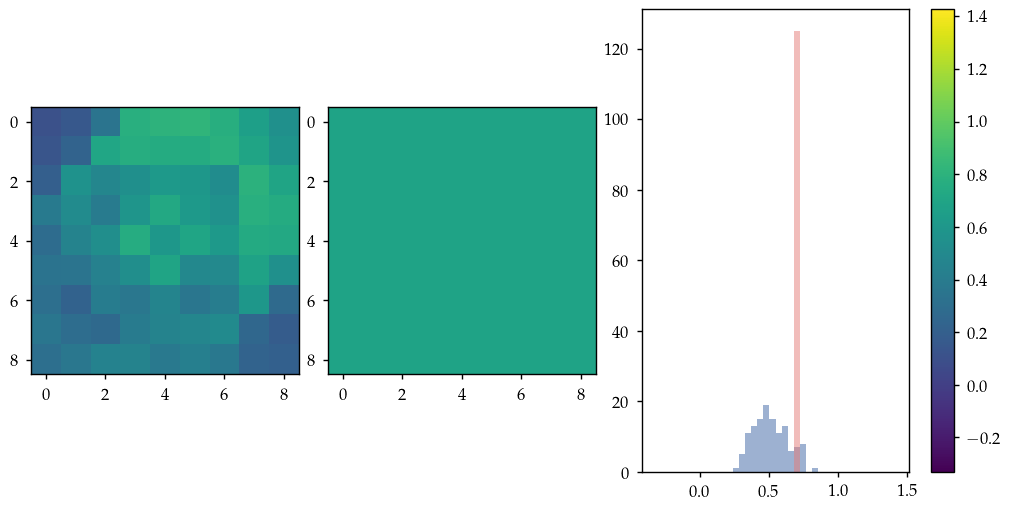

In [102]:
key = "a0"
slice1, slice2 = fasit_periodic_mask.slice
vmin = np.min(validation_periodic_mask[key][slice1:slice2, slice1:slice2, slice1:slice2]) - 5* np.std(validation_periodic_mask[key][slice1:slice2, slice1:slice2, slice1:slice2])
vmax = np.max(validation_periodic_mask[key][slice1:slice2, slice1:slice2, slice1:slice2]) + 5* np.std(validation_periodic_mask[key][slice1:slice2, slice1:slice2, slice1:slice2])
if key == "phi" or key == "theta":
    r = (0, np.pi)
else:
    r = (vmin, vmax)

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
im = axs[0].imshow(validation_periodic_mask[key][4, :, :], vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
axs[1].imshow(fasit_periodic_mask[key][4, :, :], vmin=vmin, vmax=vmax)
axs[2].hist(validation_periodic_mask[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=40, range= r, alpha = 0.5)
axs[2].hist(fasit_periodic_mask[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=40, range= r, alpha = 0.5)

print(np.mean(validation_periodic_mask[key][slice1:slice2, slice1:slice2, slice1:slice2]), np.std(validation_periodic_mask[key][slice1:slice2, slice1:slice2, slice1:slice2]))
print(np.mean(fasit_periodic_mask[key][:, :, :]), np.std(fasit_periodic_mask[key][:, :, :]))
print(validation_periodic_mask.error_data[-1])

In [139]:
validation_periodic_smallest_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\analysis\SASTT\Validation_periodic_filter1_3cube_4off_0align\SH\results\result_Validation_periodic_filter1_3cube_4off_0align_q17-40_all_again_symbolic.mat"
validation_periodic_smallest_dataset_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\Validation_periodic_filter1_3cube_4off_0align.mat"
validation_periodic_smallest = TensorTomographyReconstruction(validation_periodic_smallest_path, dataset=False)
fasit_periodic_smallest = TensorTomographyReconstruction(validation_periodic_smallest_dataset_path, dataset=True)

C:\Users\Bruker\AppData\Local\Temp\ipykernel_1976\1648647223.py:12: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(im)


0.5804876358757608 0.1120850881569005
0.6899999999999998 1.1102230246251565e-16
[0.26292509]


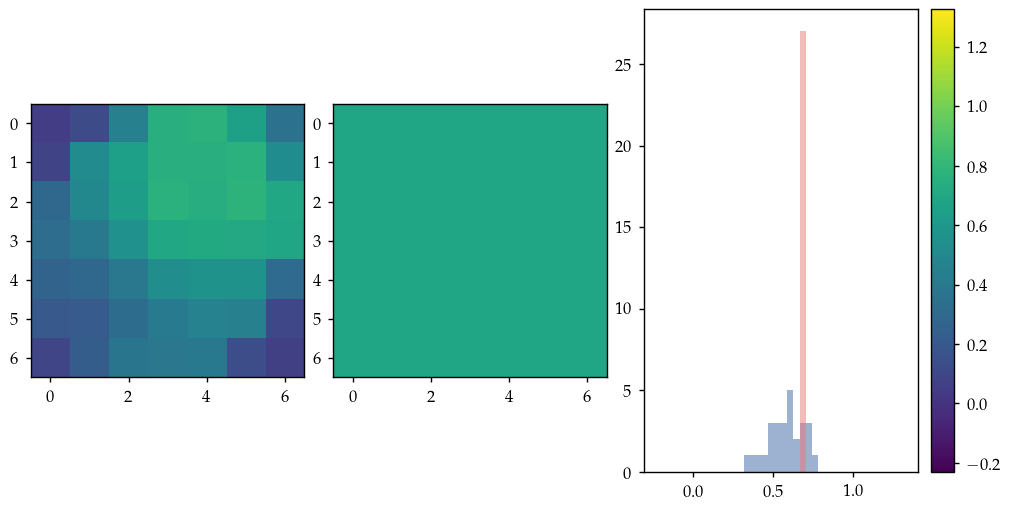

In [140]:

key = "a0"
slice1, slice2 = fasit_periodic_smallest.slice
vmin = np.min(validation_periodic_smallest[key][slice1:slice2, slice1:slice2, slice1:slice2]) - 5* np.std(validation_periodic_smallest[key][slice1:slice2, slice1:slice2, slice1:slice2])
vmax = np.max(validation_periodic_smallest[key][slice1:slice2, slice1:slice2, slice1:slice2]) + 5* np.std(validation_periodic_smallest[key][slice1:slice2, slice1:slice2, slice1:slice2])
if key == "phi" or key == "theta":
    r = (0, np.pi)
else:
    r = (vmin, vmax)

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
im = axs[0].imshow(validation_periodic_smallest[key][4, :, :], vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
axs[1].imshow(fasit_periodic_smallest[key][4, :, :], vmin=vmin, vmax=vmax)
axs[2].hist(validation_periodic_smallest[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=40, range= r, alpha = 0.5)
axs[2].hist(fasit_periodic_smallest[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=40, range= r, alpha = 0.5)

print(np.mean(validation_periodic_smallest[key][slice1:slice2, slice1:slice2, slice1:slice2]), np.std(validation_periodic_smallest[key][slice1:slice2, slice1:slice2, slice1:slice2]))
print(np.mean(fasit_periodic_smallest[key][:, :, :]), np.std(fasit_periodic_smallest[key][:, :, :]))
print(validation_periodic_smallest.error_data[-1])

In [122]:
validation_periodic_AD_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\result_Validation_periodic_filter1_3cube_4off_0align_q17-40_all_again_AD.mat"
validation_periodic_AD = TensorTomographyReconstruction(validation_periodic_AD_path, dataset=False)
fasit_periodic_AD = TensorTomographyReconstruction(validation_periodic_smallest_dataset_path, dataset=True)

C:\Users\Bruker\AppData\Local\Temp\ipykernel_1976\3594120088.py:12: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(im)


0.4772546359399129 0.20489880206954392
0.6899999999999998 1.1102230246251565e-16
[0.19568083]


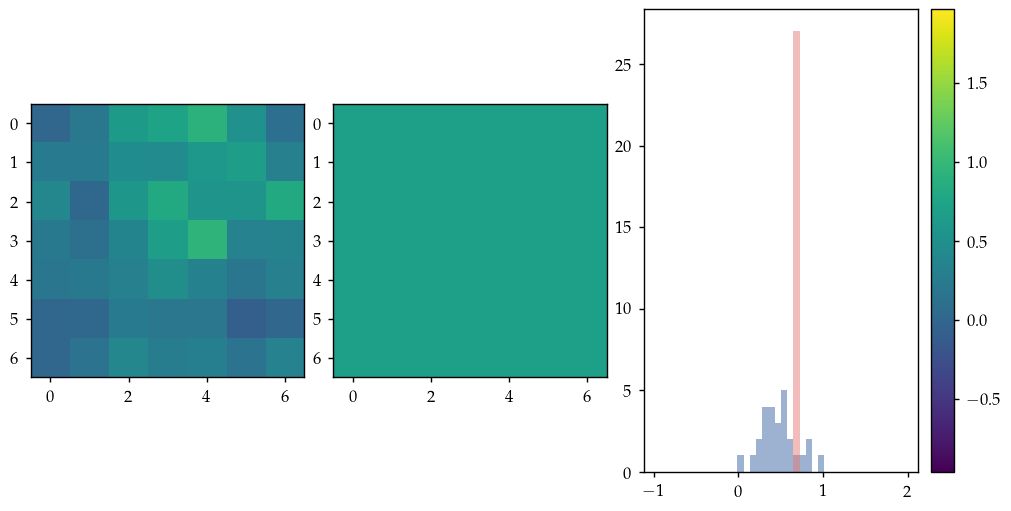

In [123]:

key = "a0"
slice1, slice2 = fasit_periodic_AD.slice
vmin = np.min(validation_periodic_AD[key][slice1:slice2, slice1:slice2, slice1:slice2]) - 5* np.std(validation_periodic_AD[key][slice1:slice2, slice1:slice2, slice1:slice2])
vmax = np.max(validation_periodic_AD[key][slice1:slice2, slice1:slice2, slice1:slice2]) + 5* np.std(validation_periodic_AD[key][slice1:slice2, slice1:slice2, slice1:slice2])
if key == "phi" or key == "theta":
    r = (0, np.pi)
else:
    r = (vmin, vmax)

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
im = axs[0].imshow(validation_periodic_AD[key][4, :, :], vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
axs[1].imshow(fasit_periodic_AD[key][4, :, :], vmin=vmin, vmax=vmax)
axs[2].hist(validation_periodic_AD[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=40, range= r, alpha = 0.5)
axs[2].hist(fasit_periodic_AD[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=40, range= r, alpha = 0.5)

print(np.mean(validation_periodic_AD[key][slice1:slice2, slice1:slice2, slice1:slice2]), np.std(validation_periodic_AD[key][slice1:slice2, slice1:slice2, slice1:slice2]))
print(np.mean(fasit_periodic_AD[key][:, :, :]), np.std(fasit_periodic_AD[key][:, :, :]))
print(validation_periodic_AD.error_data[-1])


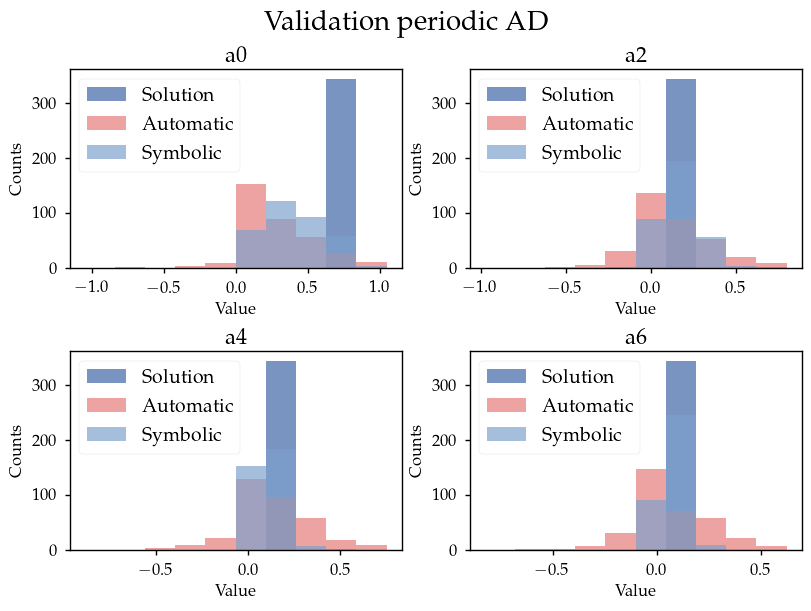

In [38]:
plot_coeffs_distribution(fasit_periodic_AD, validation_periodic_AD, validation_periodic_smallest, title = "Validation periodic AD", bins = 10)

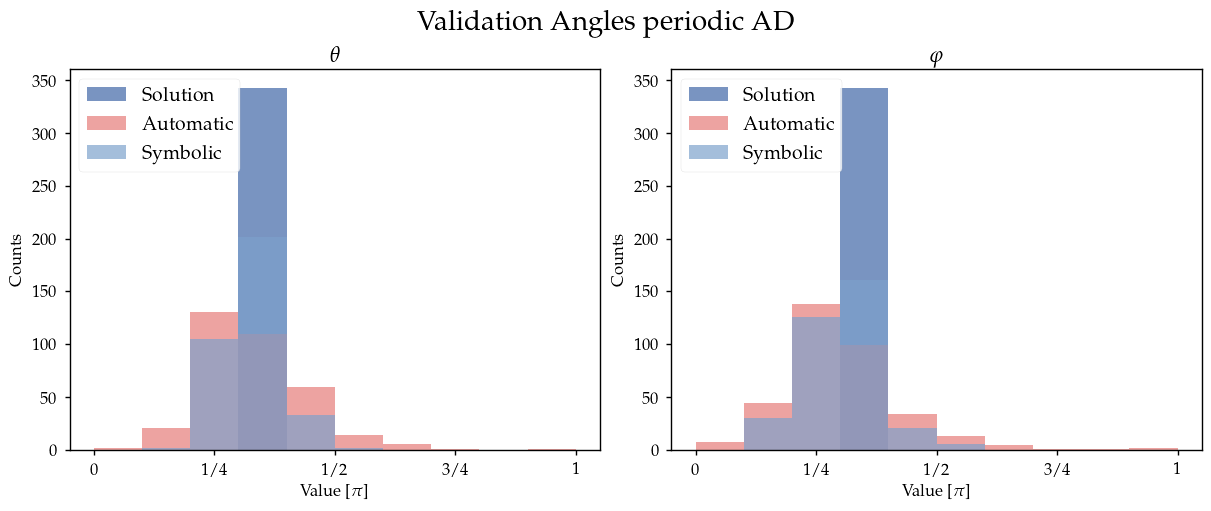

In [42]:

plot_angles_distribution(fasit_periodic_AD, validation_periodic_AD, validation_periodic_smallest, title = "Validation Angles periodic AD", bins = 10)

In [136]:
# Check python optimisation with AD and array interpolation. Gradients different shape, but correct order of magnitude

validation_periodic_python_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\analysis\SASTT\Validation_periodic_filter1_3cube_4off_0align\SH\results\result_Validation_periodic_filter1_3cube_4off_0align_q17-40_all_again_AD_python.mat"
validation_periodic_python = TensorTomographyReconstruction(validation_periodic_python_path, dataset=False)

C:\Users\Bruker\AppData\Local\Temp\ipykernel_1976\2254707109.py:12: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(im)


0.5662634586066945 0.13897052005695396
0.6899999999999998 1.1102230246251565e-16
[0.28670705]
[0.19568083]
[[3.7917852]]


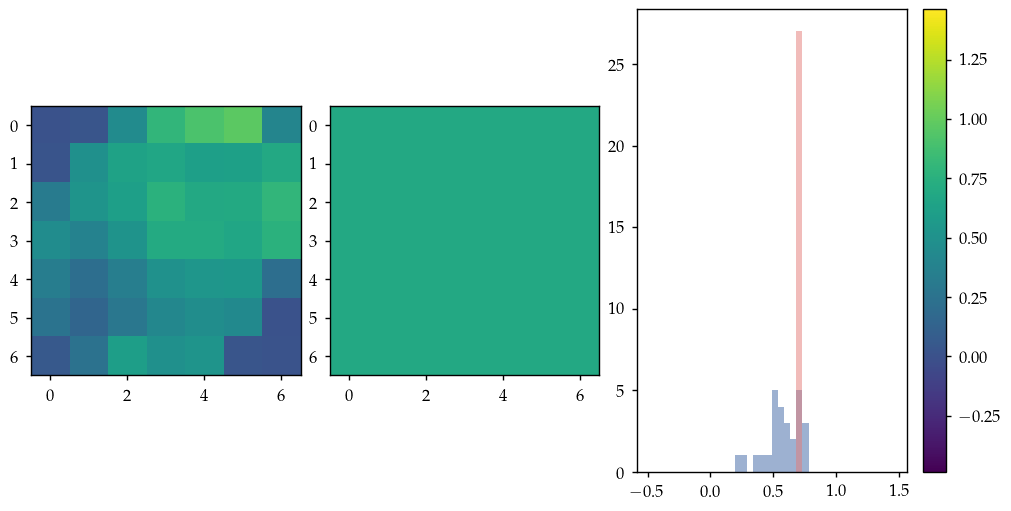

In [138]:
key = "a0"
slice1, slice2 = fasit_periodic_AD.slice
vmin = np.min(validation_periodic_python[key][slice1:slice2, slice1:slice2, slice1:slice2]) - 5* np.std(validation_periodic_python[key][slice1:slice2, slice1:slice2, slice1:slice2])
vmax = np.max(validation_periodic_python[key][slice1:slice2, slice1:slice2, slice1:slice2]) + 5* np.std(validation_periodic_python[key][slice1:slice2, slice1:slice2, slice1:slice2])
if key == "phi" or key == "theta":
    r = (0, np.pi)
else:
    r = (vmin, vmax)

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
im = axs[0].imshow(validation_periodic_python[key][4, :, :], vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
axs[1].imshow(fasit_periodic_AD[key][4, :, :], vmin=vmin, vmax=vmax)
axs[2].hist(validation_periodic_python[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=40, range= r, alpha = 0.5)
axs[2].hist(fasit_periodic_AD[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=40, range= r, alpha = 0.5)

print(np.mean(validation_periodic_python[key][slice1:slice2, slice1:slice2, slice1:slice2]), np.std(validation_periodic_python[key][slice1:slice2, slice1:slice2, slice1:slice2]))
print(np.mean(fasit_periodic_AD[key][:, :, :]), np.std(fasit_periodic_AD[key][:, :, :]))
print(validation_periodic_python.error_data[-1])
print(validation_periodic_AD.error_data[-1])
print(validation_periodic_smallest.timing_data)

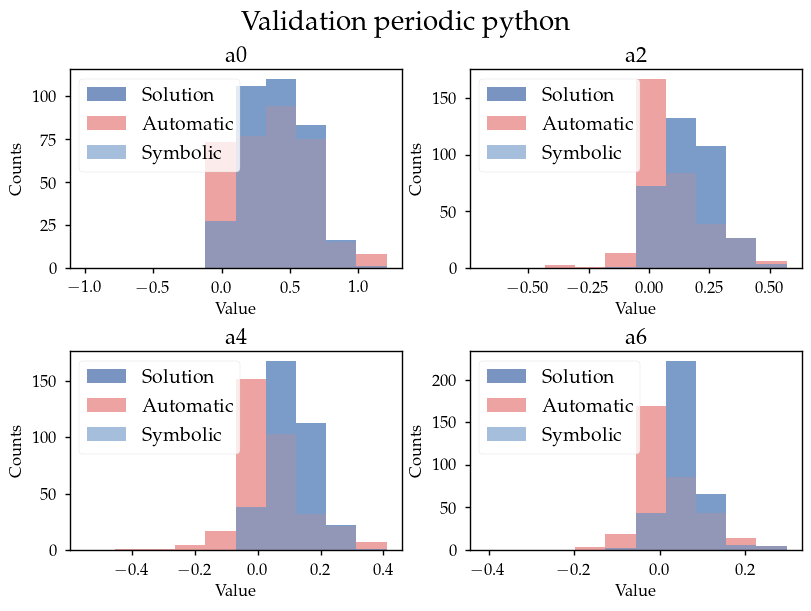

In [141]:
# Must slice it
plot_coeffs_distribution(validation_periodic_smallest, validation_periodic_python, validation_periodic_smallest, title = "Validation periodic python", bins = 10)

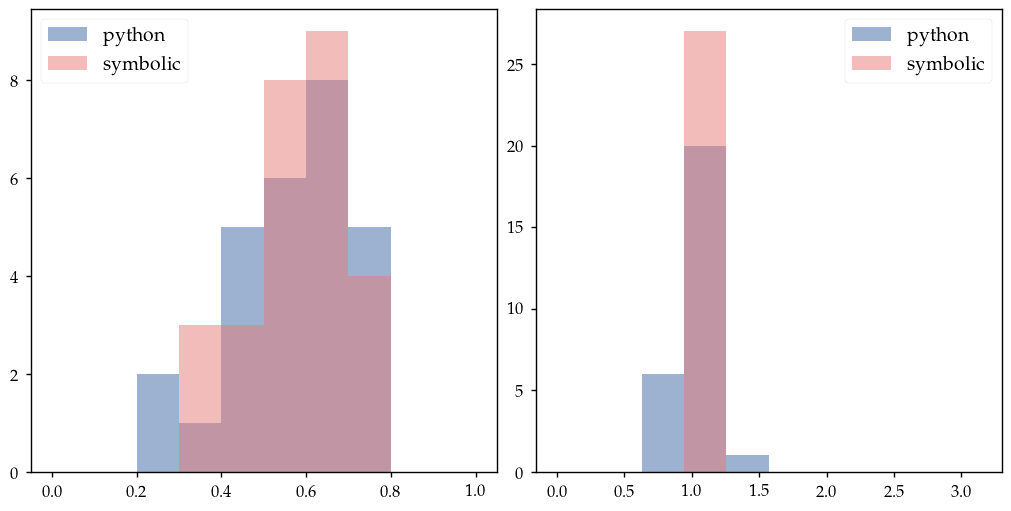

In [143]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(validation_periodic_python["a0"][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=10, range= (0,1), alpha = 0.5, label = "python")
#axs[0].hist(validation_periodic_AD["a0"][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=10, range= (0,1), alpha = 0.5, label = "AD")
axs[0].hist(validation_periodic_smallest["a0"][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=10, range= (0,1), alpha = 0.5, label = "symbolic")
axs[0].legend()

axs[1].hist(validation_periodic_python["theta"][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=10, range= (0,np.pi), alpha = 0.5, label = "python")
#axs[1].hist(validation_periodic_AD["theta"][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=10, range= (0,np.pi), alpha = 0.5, label = "AD")
axs[1].hist(validation_periodic_smallest["theta"][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), bins=10, range= (0,np.pi), alpha = 0.5, label = "symbolic")
axs[1].legend()
